In [ ]:
# Montamos nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Seleccionamos la carpeta y verificamos los contenidos
%cd "/content/drive/MyDrive/TC3002B-IA"
!ls

Mounted at /content/drive
/content/drive/MyDrive/TC3002B-IA
external-imgs  model  smile_no_smile_v1.h5


In [ ]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Directorios de trabajo
base_dir = 'model'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

Found 963 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
(8, 64, 64, 3)
[1. 0. 1. 0. 0. 1. 0. 0.]


<Figure size 640x480 with 0 Axes>

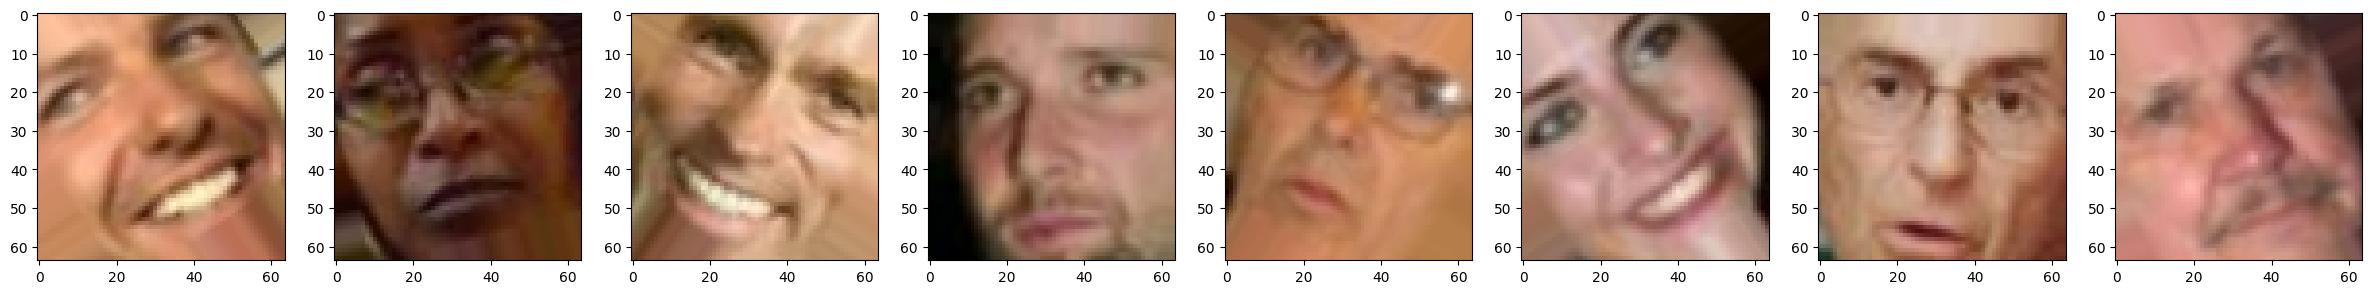

In [76]:
# Data augmentation
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						  width_shift_range = 0.1,
						  shear_range = 0.15,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (64, 64),
							batch_size = 8,
							class_mode ='binary',
							)

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (64, 64),
					batch_size = 8,
					class_mode= 'binary')

val_datagen = ImageDataGenerator(
		 					rescale = 1./255,
							rotation_range = 40,
						  width_shift_range = 0.1,
						  shear_range = 0.15,
							horizontal_flip = True)

val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (64,64),
							batch_size = 8,
							class_mode= 'binary')

# Muestra la augmentation
images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1960)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

Epoch 1/10
121/121 [==============================] - 10s 75ms/step - loss: 0.6780 - acc: 0.5940 - val_loss: 0.7529 - val_acc: 0.4500
Epoch 2/10
121/121 [==============================] - 7s 60ms/step - loss: 0.5804 - acc: 0.7310 - val_loss: 0.4780 - val_acc: 0.8750
Epoch 3/10
121/121 [==============================] - 8s 62ms/step - loss: 0.4570 - acc: 0.8048 - val_loss: 0.3076 - val_acc: 0.9250
Epoch 4/10
121/121 [==============================] - 9s 70ms/step - loss: 0.4134 - acc: 0.8266 - val_loss: 0.4371 - val_acc: 0.8500
Epoch 5/10
121/121 [==============================] - 7s 59ms/step - loss: 0.4009 - acc: 0.8318 - val_loss: 0.5050 - val_acc: 0.8500
Epoch 6/10
121/121 [==============================] - 8s 68ms/step - loss: 0.3797 - acc: 0.8577 - val_loss: 0.3941 - val_acc: 0.8250
Epoch 7/10
121/121 [==============================] - 8s 70ms/step - loss: 0.3492 - acc: 0.8567 - val_loss: 0.3467 - val_acc: 0.8500
Epoch 8/10
121/121 [==============================] - 7s 56ms/step -

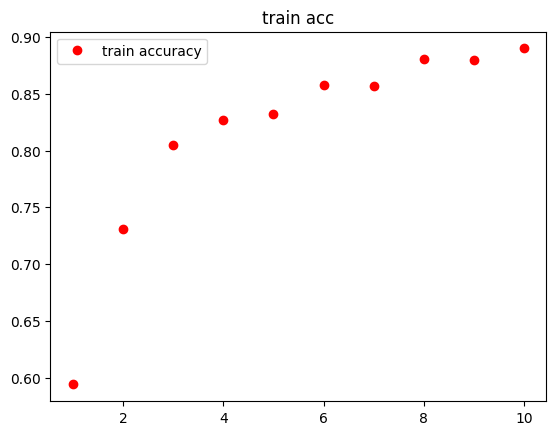

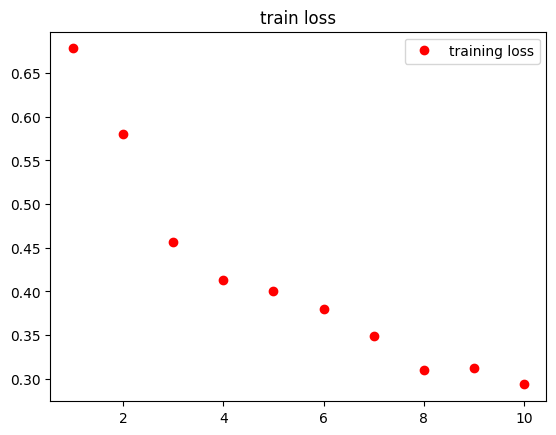

In [ ]:
# Creación del modelo
model = models.Sequential()
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(
					train_generator,
					epochs = 10,
					validation_data= val_generator,
					validation_steps = 5)

acc = history.history['acc']
loss = history.history['loss']

model.save('smile_no_smile_v1.h5')

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'ro',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'ro', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

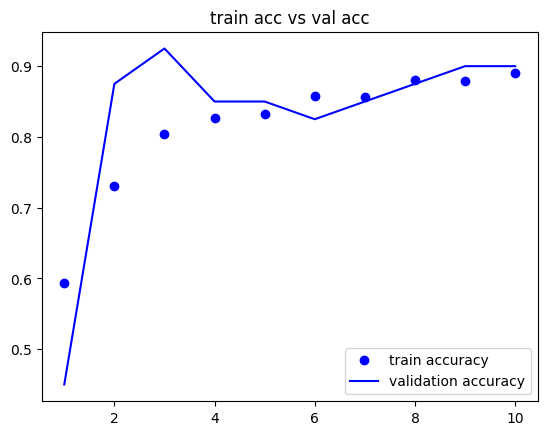

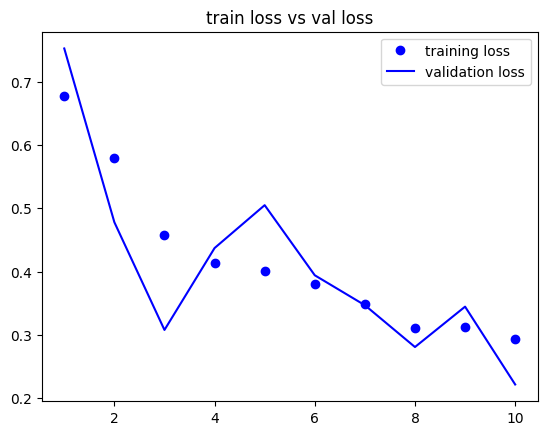

<ipython-input-21-469691d3c3f3>:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.925000011920929


,Model,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy
0,V1,31.883692,0.925,0.2935,0.8899,0.2213,0.9


In [ ]:
# Evaluación del modelo
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V1'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.2935],
    'train accuracy' : [0.8899],
    'val loss' : [0.2213],
    'val accuracy' : [0.9000]
}

results = pd.DataFrame(data)

results

# Procesado y predicción de imágenes

1/1 [==============================] - 0s 138ms/step


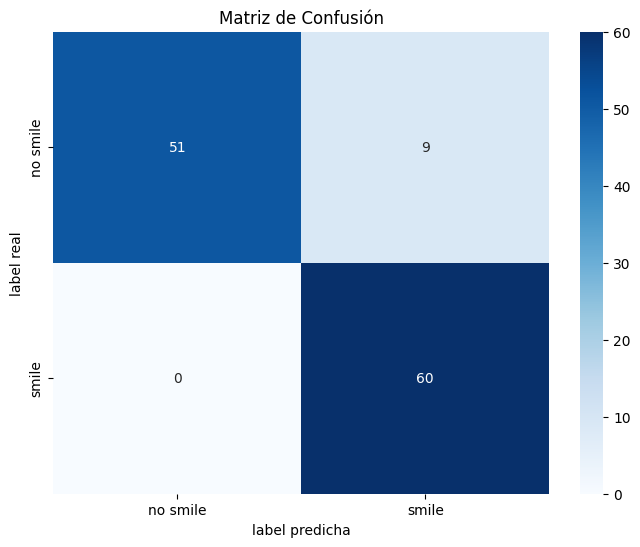

In [ ]:
# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Cargamos el modelo para no tener que volver a entrenar
model_v1 = tf.keras.models.load_model('smile_no_smile_v1.h5')

# Accumulate predictions and labels
all_predictions = []
all_labels = []

# Iterate over the test generator
for i in range(len(test_generator)):
    test_images, test_labels = test_generator[i]
    batch_predictions = model_v1.predict(test_images)
    all_predictions.extend(batch_predictions)
    all_labels.extend(test_labels)

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Convert predictions to binary
binary_predictions = (all_predictions > 0.5).astype("int32")

# Obtain confusion matrix
confusion_mat = confusion_matrix(all_labels, binary_predictions)

# Heatmap de la matríz
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusión')
plt.xlabel('label predicha')
plt.ylabel('label real')

plt.show()

In [ ]:
# Estadisticas de precision
true_positives = 51
true_negatives = 60
false_positives = 9
false_negatives = 0

mat_accuracy = (true_positives + true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
mat_precision = true_positives/(true_positives+false_positives)
mat_recall = true_positives/(true_positives+false_negatives)
mat_f1score = (2*mat_precision*mat_recall)/(mat_precision+mat_recall)

print("accuracy: ", mat_accuracy)
print("precision: ", mat_precision)
print("recall: ", mat_recall)
print("f1 score: ", mat_f1score)

accuracy:  0.925
precision:  0.85
recall:  1.0
f1 score:  0.9189189189189189


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 29, 29, 15)        1365      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 14, 14, 15)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 2940)              0         
                                                                 
 dense_30 (Dense)            (None, 128)             

Epoch 1/10
121/121 [==============================] - 12s 72ms/step - loss: 0.6526 - acc: 0.6314 - val_loss: 0.6100 - val_acc: 0.6250
Epoch 2/10
121/121 [==============================] - 10s 79ms/step - loss: 0.5129 - acc: 0.7695 - val_loss: 0.5177 - val_acc: 0.8000
Epoch 3/10
121/121 [==============================] - 9s 76ms/step - loss: 0.4335 - acc: 0.8359 - val_loss: 0.3991 - val_acc: 0.8500
Epoch 4/10
121/121 [==============================] - 8s 64ms/step - loss: 0.3789 - acc: 0.8453 - val_loss: 0.2024 - val_acc: 0.9500
Epoch 5/10
121/121 [==============================] - 9s 76ms/step - loss: 0.3417 - acc: 0.8712 - val_loss: 0.4599 - val_acc: 0.7500
Epoch 6/10
121/121 [==============================] - 8s 64ms/step - loss: 0.3314 - acc: 0.8650 - val_loss: 0.4029 - val_acc: 0.7750
Epoch 7/10
121/121 [==============================] - 8s 62ms/step - loss: 0.3004 - acc: 0.8920 - val_loss: 0.2500 - val_acc: 0.9000
Epoch 8/10
121/121 [==============================] - 9s 75ms/step 

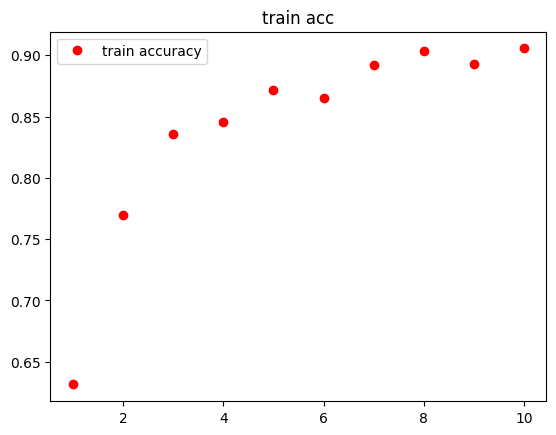

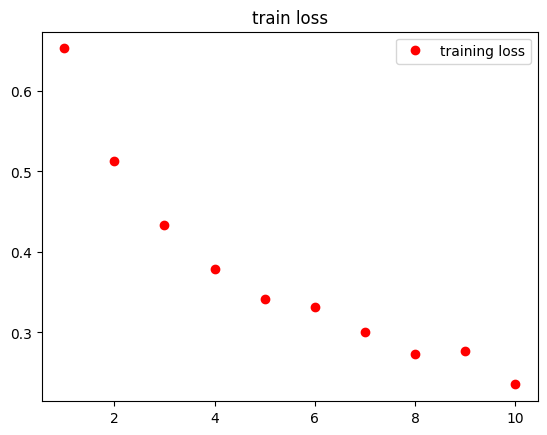

In [39]:
# Modelo v2
# Creación del modelo
model_v2 = models.Sequential()

#conv_base= VGG16(weights='imagenet',
#								include_top = False,
#								input_shape = (64,64,3))
model_v2.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model_v2.add(layers.MaxPooling2D(2,2))
model_v2.add(layers.Conv2D(15, (3,3), activation="relu", input_shape=(64,64,3)))
model_v2.add(layers.MaxPooling2D(2,2))
model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(128, activation='relu'))
model_v2.add(layers.Dense(1, activation='sigmoid'))

#conv_base.trainable = False

model_v2.summary()

model_v2.compile(loss='binary_crossentropy',
						optimizer=optimizers.Adam(lr=2e-5),
						metrics=['acc'])

history = model_v2.fit(
					train_generator,
					epochs = 10,
					validation_data= val_generator,
					validation_steps = 5)

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'ro',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'ro', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

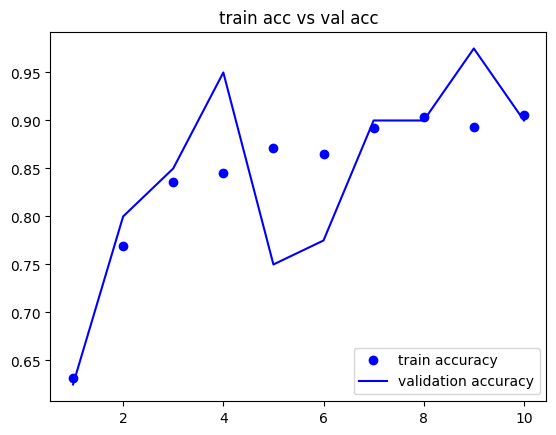

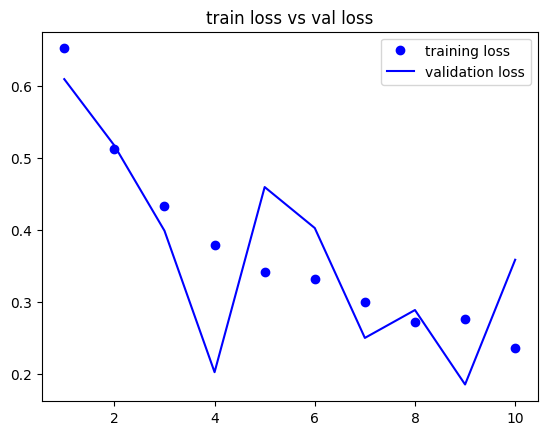

<ipython-input-49-ec3cd83ec77b>:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model_v2.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.8999999761581421


,Model,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy
0,V2,28.740805,0.9,0.2353,0.9055,0.3588,0.9


In [49]:
# Evaluación del modelo
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_loss, test_acc = model_v2.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V2'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.2353],
    'train accuracy' : [0.9055],
    'val loss' : [0.3588],
    'val accuracy' : [0.9000]
}

results = pd.DataFrame(data)

results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 [==============================] - 0s 36ms/step


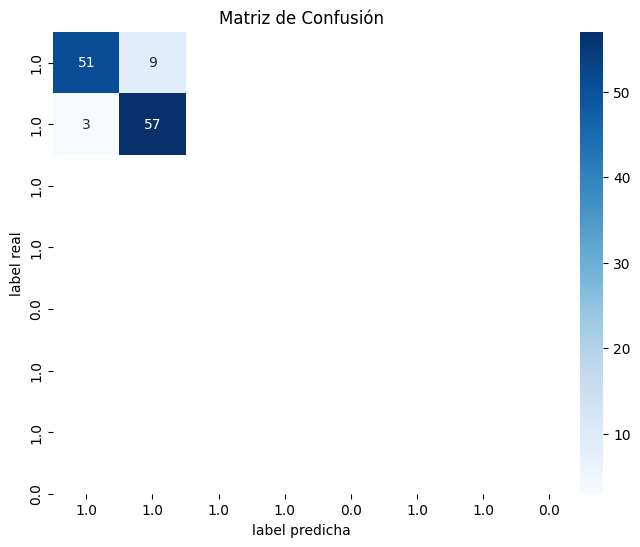

In [47]:
# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

model_v2.save('smile_no_smile_v2.h5')

model_v2_saved = tf.keras.models.load_model('smile_no_smile_v2.h5')

# Accumulate predictions and labels
all_predictions = []
all_labels = []

# Iterate over the test generator
for i in range(len(test_generator)):
    test_images, test_labels = test_generator[i]
    batch_predictions = model_v2_saved.predict(test_images)
    all_predictions.extend(batch_predictions)
    all_labels.extend(test_labels)

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Convert predictions to binary
binary_predictions = (all_predictions > 0.5).astype("int32")

# Obtain confusion matrix
confusion_mat = confusion_matrix(all_labels, binary_predictions)

# Heatmap de la matríz
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusión')
plt.xlabel('label predicha')
plt.ylabel('label real')

plt.show()

In [48]:
# Estadisticas de precision
true_positives = 51
true_negatives = 57
false_positives = 9
false_negatives = 3

mat_accuracy = (true_positives + true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
mat_precision = true_positives/(true_positives+false_positives)
mat_recall = true_positives/(true_positives+false_negatives)
mat_f1score = (2*mat_precision*mat_recall)/(mat_precision+mat_recall)

print("accuracy: ", mat_accuracy)
print("precision: ", mat_precision)
print("recall: ", mat_recall)
print("f1 score: ", mat_f1score)

accuracy:  0.9
precision:  0.85
recall:  0.9444444444444444
f1 score:  0.8947368421052632


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 29, 29, 15)        1365      
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 14, 14, 15)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 15)        0         
                                                                 
 flatten_29 (Flatten)        (None, 2940)            

Epoch 1/10
121/121 [==============================] - 10s 62ms/step - loss: 0.6979 - acc: 0.5016 - val_loss: 0.6724 - val_acc: 0.6250
Epoch 2/10
121/121 [==============================] - 9s 72ms/step - loss: 0.6458 - acc: 0.6428 - val_loss: 0.6286 - val_acc: 0.7250
Epoch 3/10
121/121 [==============================] - 7s 59ms/step - loss: 0.5203 - acc: 0.7612 - val_loss: 0.4486 - val_acc: 0.8500
Epoch 4/10
121/121 [==============================] - 9s 74ms/step - loss: 0.4489 - acc: 0.8100 - val_loss: 0.4330 - val_acc: 0.8250
Epoch 5/10
121/121 [==============================] - 7s 59ms/step - loss: 0.4310 - acc: 0.8276 - val_loss: 0.3317 - val_acc: 0.8250
Epoch 6/10
121/121 [==============================] - 7s 60ms/step - loss: 0.3819 - acc: 0.8598 - val_loss: 0.3227 - val_acc: 0.8500
Epoch 7/10
121/121 [==============================] - 9s 74ms/step - loss: 0.3554 - acc: 0.8577 - val_loss: 0.3845 - val_acc: 0.8750
Epoch 8/10
121/121 [==============================] - 7s 59ms/step -

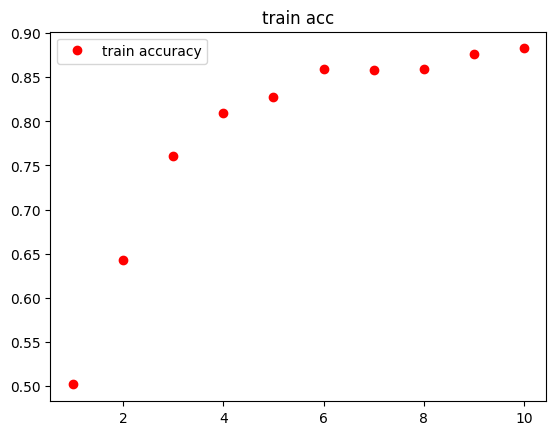

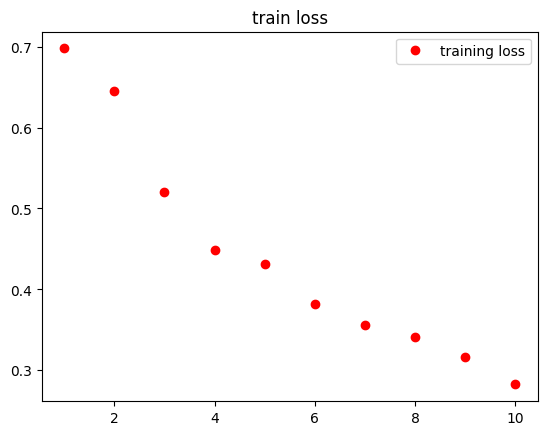

In [80]:
# Tercer modelo (VGG16) v3
# Creación del modelo
model_v3 = models.Sequential()

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (64,64,3))
model_v3.add(layers.Conv2D(10, (3,3), activation="relu", input_shape=(64,64,3)))
model_v3.add(layers.MaxPooling2D(2,2))
model_v3.add(layers.Conv2D(15, (3,3), activation="relu", input_shape=(64,64,3)))
model_v3.add(layers.MaxPooling2D(2,2))
model_v3.add(layers.Dropout(0.1))
model_v3.add(layers.Flatten())
model_v3.add(layers.Dense(64, activation='relu'))
model_v3.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model_v3.summary()

model_v3.compile(loss='binary_crossentropy',
						optimizer=optimizers.Adam(lr=2e-5),
						metrics=['acc'])

history = model_v3.fit(
					train_generator,
					epochs = 10,
					validation_data= val_generator,
					validation_steps = 5)

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'ro',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'ro', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

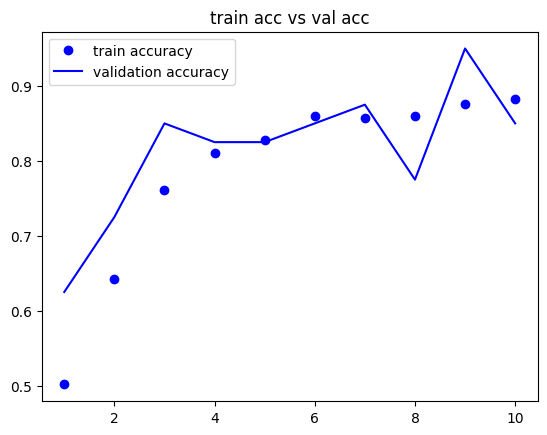

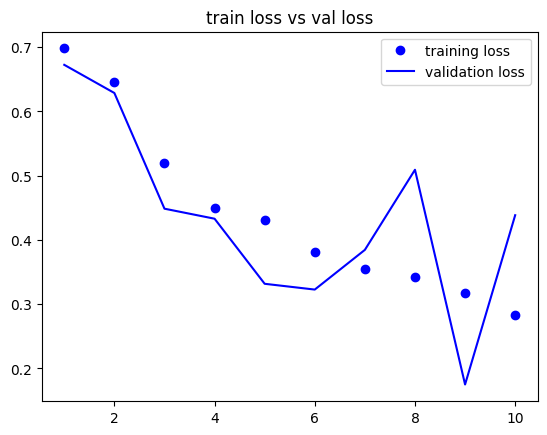

<ipython-input-82-18b1dbc3bccc>:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model_v3.evaluate_generator(test_generator)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.875


,Model,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy
0,V3,34.564095,0.875,0.2824,0.8827,0.4384,0.85


In [82]:
# Evaluación del modelo
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_loss, test_acc = model_v3.evaluate_generator(test_generator)
print('\ntest acc :\n', test_acc)

# Reporte de resultados
data = {
    'Model': ['V3'],
    'test loss': [test_loss],
    'test accuracy': [test_acc],
    'train loss' : [0.2824],
    'train accuracy' : [0.8827],
    'val loss' : [0.4384],
    'val accuracy' : [0.8500]
}

results = pd.DataFrame(data)

results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


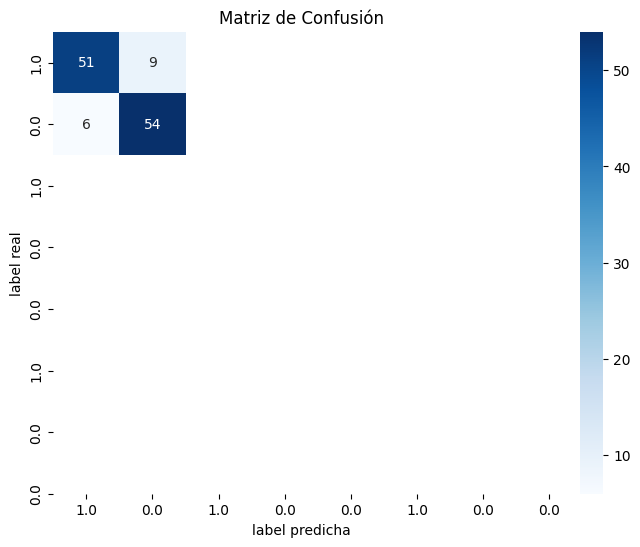

In [83]:
# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

model_v3.save('smile_no_smile_v3.h5')

model_v3_saved = tf.keras.models.load_model('smile_no_smile_v3.h5')

# Accumulate predictions and labels
all_predictions = []
all_labels = []

# Iterate over the test generator
for i in range(len(test_generator)):
    test_images, test_labels = test_generator[i]
    batch_predictions = model_v3_saved.predict(test_images)
    all_predictions.extend(batch_predictions)
    all_labels.extend(test_labels)

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Convert predictions to binary
binary_predictions = (all_predictions > 0.5).astype("int32")

# Obtain confusion matrix
confusion_mat = confusion_matrix(all_labels, binary_predictions)

# Heatmap de la matríz
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusión')
plt.xlabel('label predicha')
plt.ylabel('label real')

plt.show()

In [84]:
# Estadisticas de precision
true_positives = 51
true_negatives = 54
false_positives = 9
false_negatives = 6

mat_accuracy = (true_positives + true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
mat_precision = true_positives/(true_positives+false_positives)
mat_recall = true_positives/(true_positives+false_negatives)
mat_f1score = (2*mat_precision*mat_recall)/(mat_precision+mat_recall)

print("accuracy: ", mat_accuracy)
print("precision: ", mat_precision)
print("recall: ", mat_recall)
print("f1 score: ", mat_f1score)

accuracy:  0.875
precision:  0.85
recall:  0.8947368421052632
f1 score:  0.8717948717948718
